## Data Augmentation on Tabular Data for Anamoly Detection

In situations where anomaly detection is required, it is most likely that there is a class imbalance, meaning that there is an asymmetry in the amount of data between 'normal' and 'anomalic' cases. Here, we test if using data augmentation to complement the class imbalance problem improves anolmaly detecction.

While we use of credit card transaction dataset here, we further aim to apply this to data augmention of blockchain data, which would require more work in terms of understanding the significance of and preprocessing the features/columns.

In [176]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix


In [83]:
path = os.getcwd()

cred_df = pd.read_csv(path + '/creditcard.csv')
cred_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [84]:
cred_df.dropna()
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [85]:
# 0 = Normal, 1 = Fraud
cred_df['Class'].value_counts() 

0    284315
1       492
Name: Class, dtype: int64

In [86]:
fraud = cred_df[cred_df['Class']==1]
normal = cred_df[cred_df['Class']==0]
anom_fraction = len(fraud)/len(cred_df)
anom_fraction

0.001727485630620034

0.17% of all transactions are fraud, which means this is an anomaly detection problem.

## Data Preprocessing

<AxesSubplot:>

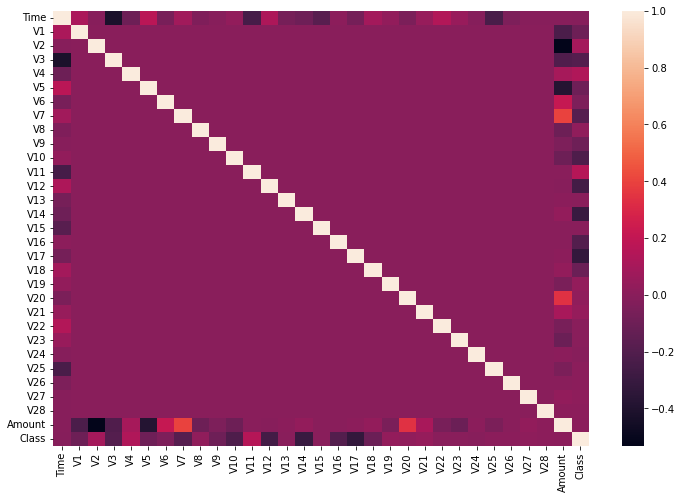

In [87]:
plt.figure(figsize=(12,8))
sns.heatmap(cred_df.corr()) # Heatmap of correlation between columns of ‘cred_df’.

# No multicolinearlity, no need to drop any columns

/var/folders/tg/qk_bf5tn3v95x0grrrq9bjw00000gn/T/ipykernel_4000/1173334815.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cred_df[col][cred_df['Class']==0],color='g',label='Genuine Class')
/var/folders/tg/qk_bf5tn3v95x0grrrq9bjw00000gn/T/ipykernel_4000/1173334815.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

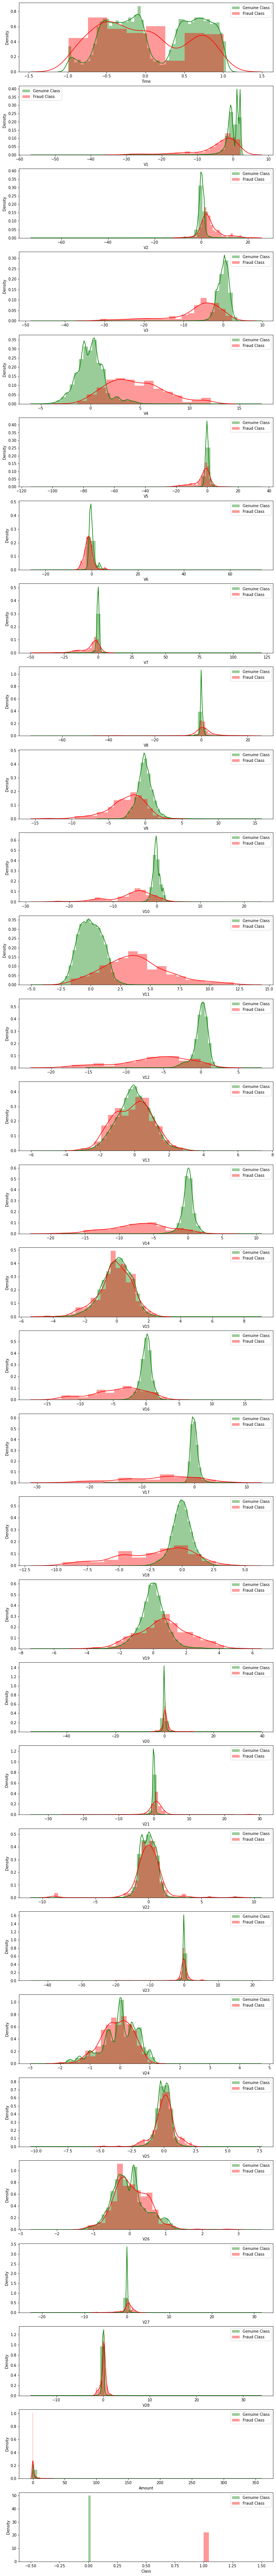

In [211]:
import matplotlib.gridspec as gridspec

#Data Visualization for checking the distribution for Genuine cases & Fraud cases for each feature
v_features = cred_df.columns
plt.figure(figsize=(12,31*4))
gs = gridspec.GridSpec(31,1)

for i, col in enumerate(v_features):
    ax = plt.subplot(gs[i])
    sns.distplot(cred_df[col][cred_df['Class']==0],color='g',label='Genuine Class')
    sns.distplot(cred_df[col][cred_df['Class']==1],color='r',label='Fraud Class')
    ax.legend()
plt.show()

Distributions of V4, V5, V7, V12, V14, V19, V21, V22, V23, V24, V25, V26, V27, V28 don't appear to be informative in disntiguishing normal and anomaly cases.

In [117]:
# from sklearn.model_selection import train_test_split

# train_df, test_df = train_test_split(cred_df, test_size=0.2)
# X_train = train_df.drop('Class', axis=1)
# y_train = train_df['Class']

# X_test = test_df.drop('Class', axis=1)
# y_test = test_df['Class']

# # train and test for datasets with dropped columns
# cred_df_drop = cred_df.drop(['V12','V14','V21', 'V23','V24','V25','V27'], axis=1)
# train1_df, test1_df = train_test_split(cred_df_drop, test_size=0.2)

# X_train1 = train1_df.drop('Class', axis=1)
# y_train1 = train1_df['Class']

# X_test1 = test1_df.drop('Class', axis=1)
# y_test1 = test1_df['Class']


In [95]:
# train_df, test_df = train_test_split(cred_df, test_size=0.2)

# X_train = train_df.drop('Class', axis=1)
# y_train = train_df['Class']

# X_test = test_df.drop('Class', axis=1)
# y_test = test_df['Class']

### Looking at the appropriate metrics

Our goal in anomaly detection is to maximize Precision and Recall value when setting 'fraud' cases positive. As normal cases are predominant in the dataset, accuracy is not so informative as predicting everything to be normal would still give us high accuracy. (high baseline)

$$Precision  =  \frac{True Positive}{True Positive + False Positive}$$




$$Recall = \frac{True Positive}{True Positive + False Negative}$$




$$f1 score = \frac{Precision * Recall}{Precision + Recall}$$



In Fraud detection problem, False Negative is more costly then False Positive (i.e. Predicting a Fraud to be Normal is more dangerous than predicting a normal case fraud). But we still don't want our algorithm to have too many False Positives and predict too many normal cases to be frauds.

While we focus on improving Recall, we dont want precision values also have resonable compared to recall. (This would mean we are predicting too many normal cases as fraud)


## Selecting a model

1. Isolation Forest
2. Logistic Regression

In [130]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
cred_df['Amount'] = rob_scaler.fit_transform(cred_df['Amount'].values.reshape(-1,1))
cred_df['Time'] = rob_scaler.fit_transform(cred_df['Time'].values.reshape(-1,1))
cred_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split


# Logistic Regression
X = cred_df.drop("Class", axis=1)
y = cred_df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

model1 = LogisticRegression(random_state=2)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Logistic Regression")
print("Accuracy: %.3f"%(accuracy))
print(classification_report(y_test, y_pred1))


#Isolation Forest
model2 = IsolationForest(max_samples = len(train_df), n_estimators=100)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

y_pred2[y_pred2==1] = 0 
y_pred2[y_pred2==-1] = 1

print("Isolation Forest")
print("Accuracy: %.3f"%(accuracy))
print(classification_report(y_test, y_pred2))



/Users/kim-unyoung/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.90      0.71      0.79        84

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Isolation Forest
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.30      0.44      0.36        84

    accuracy                           1.00     56962
   macro avg       0.65      0.72      0.68     56962
weighted avg       1.00      1.00      1.00     56962



Text(215.61818181818177, 0.5, 'Actual label')

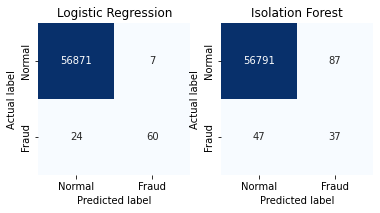

In [135]:
mat1 = confusion_matrix(y_test, y_pred1)
mat2 = confusion_matrix(y_test, y_pred2)
labels = ['Normal', 'Fraud']

plt.subplot(1, 2, 1)
sns.heatmap(mat1, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

plt.subplot(1, 2, 2)
sns.heatmap(mat2, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Isolation Forest')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')



Logistic Regression performs better

Using the metrics above as a baseline value, we now experiment on different data augmentation methods to test if they can improve the performance of the model

## Data Augmentation Methods
1. SMOTE Oversampling 


2. CT-GAN  

### 1. SMOTE Oversampling

Generating synthetic data of minority samples to prevent overfitting.

1. Random Sample from the minority class is selected
2. k nearest neighbors are found
3. One of the k nearest neighbors are randomly selected
4. New synthetic sample is formed based on (k nearest neigbor + the minority class sample)


In [99]:
# Number of classes in the training set before smote
y_train.value_counts()

0    227454
1       391
Name: Class, dtype: int64

In [136]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

y_smote.value_counts()

0    227437
1    227437
Name: Class, dtype: int64

In [137]:
model1.fit(X_smote, y_smote)

y_smote_predict = model1.predict(X_test)
print(classification_report(y_test, y_smote_predict))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56878
           1       0.05      0.90      0.10        84

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.98      0.99     56962



Text(91.68, 0.5, 'Actual label')

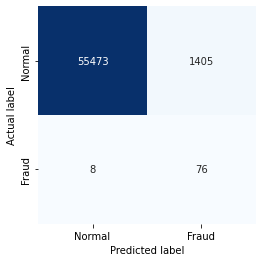

In [138]:
mat = confusion_matrix(y_test, y_smote_predict)
labels = ['Normal', 'Fraud']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

### 2. CTGAN

GAN consists of two neural networks: Generator & Discriminator.

- Generator: Generates new data. Attempts to fool the discriminator.
- Discrimator: Attempts to classify which is real and which is fake. Attempts to maximize classification accuracy. 


Tabular Data

- Numerical
- Categorical: Ordinal(Order), Nominal(No Order)


In [140]:
# Only augment under
fraud_df = cred_df[cred_df['Class']==1]
fraud_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-0.990214,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.307413,1
623,-0.989438,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,7.084469,1
4920,-0.942563,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,3.045204,1
6108,-0.912910,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.517013,1
6329,-0.906648,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.293440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,0.992140,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,5.142178,1
280143,0.994549,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.296793,1
280149,0.994596,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.780968,1
281144,1.001821,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,3.116048,1


In [210]:
from ctgan import CTGAN
from ctgan import load_demo

discrete_cols = []
ctgan = CTGAN(epochs=50)
ctgan.fit(fraud_df, discrete_cols)
samples = ctgan.sample(10)      #Generate 10 Samples

samples


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.517950,0.338659,14.342903,-8.901419,3.125033,-3.923217,0.296140,-2.687237,-0.028992,-10.540821,...,0.701035,-0.479139,0.083894,-0.408770,0.188014,-0.729563,-1.869490,0.494135,0.398767,1
1,0.745869,1.189690,1.674967,-10.366879,0.166007,-1.353565,1.406844,2.594808,1.725047,-4.411354,...,0.462749,1.329264,-0.482691,-0.012254,-4.289978,0.075638,0.628983,-0.186600,-0.018591,1
2,0.062727,-2.503647,0.420869,-8.801059,3.000671,-0.605384,2.151342,-12.606186,-1.703328,-2.811180,...,3.795398,-3.141326,2.205261,0.812577,-0.786616,0.064676,1.134748,0.516964,0.810472,1
3,0.943146,-1.485814,1.691103,-12.923740,6.935188,1.605621,-1.968073,0.130726,1.674162,-0.262701,...,2.648864,0.741156,0.769065,-0.008467,-0.587300,-0.297124,-0.254857,0.579759,-0.512120,1
4,1.146181,-0.729218,0.786619,-23.054151,6.247392,5.453083,0.183196,5.851497,-0.361685,-1.539698,...,3.865385,3.803974,0.679356,0.911668,-0.691605,-0.107067,0.099993,0.123435,0.225873,1
5,0.584188,-22.147941,2.527546,-25.569220,2.903600,5.638221,0.817603,-0.648343,-2.355648,-3.337423,...,1.946535,0.239873,2.263806,-0.024058,-4.014711,-0.031256,-0.209160,0.197274,0.501167,1
6,0.006851,-9.155975,1.695524,-4.148567,3.423857,4.928842,1.073551,-15.504753,-0.943854,-0.960511,...,3.414261,0.583037,2.235837,0.312860,-0.733043,-0.960279,-3.992733,0.390743,0.292155,1
7,1.021815,-7.991729,1.624409,-4.111175,-0.333077,4.463018,1.908467,0.902445,-1.886558,-1.157780,...,2.597915,1.451831,0.685552,-0.932131,-0.743912,0.245138,0.758782,0.181193,0.444885,1
8,0.343526,1.110488,5.152156,-9.568252,-1.343506,0.504468,0.165663,1.294223,-5.460855,-1.771782,...,-0.538089,0.417798,0.649294,-0.300661,-1.199191,-0.718182,-0.260302,0.050581,3.524829,1
9,0.505947,-9.684752,-1.801215,-8.348839,5.928005,-1.790328,1.782835,-1.270850,0.236677,-3.354170,...,3.760079,2.101032,0.830656,-0.425326,-1.047034,-0.787590,-0.490935,0.634029,-0.545960,1


To ensure fair classification report, we add the sample/augmented data only in the training set. Thus, test set only comprises of original data.

In [208]:
pd.set_option('mode.chained_assignment', None)


In [173]:
sample_ratio = [0.005,0.01,0.05,0.1,0.2,0.5,1]

[1424, 2848, 14240, 28480, 56961, 142403, 284807]

In [209]:
#Show how the performance of the model changes for different number of synthetic anomaly data
 
sample_ratio = [0.005,0.01,0.05,0.1,0.2,0.5,1]

X = cred_df.drop("Class", axis=1)
y = cred_df.loc["Class"]

def logistic_reg(ratio, epoch):
    discrete_cols = []
    ctgan = CTGAN(epochs=epoch)
    ctgan.fit(fraud_df, discrete_cols)
    samples = ctgan.sample(int(ratio*len(cred_df)))

    X_generated = samples.drop("Class", axis=1)
    y_generated = samples["Class"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
    X_train_syn = pd.concat([X_train, X_generated])
    y_train_syn = pd.concat([y_train, y_generated])

    model1 = LogisticRegression(random_state=2)
    model1.fit(X_train_syn, y_train_syn)
    y_pred3 = model1.predict(X_test)
    print("Ratio of synthentic data(Anomaly): ", ratio*100, '%')
    print(classification_report(y_test, y_pred3))

for i in sample_ratio:
    logistic_reg(i, 50)

Ratio of synthentic data(Anomaly):  0.5 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.86      0.74      0.79        84

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Ratio of synthentic data(Anomaly):  1.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.87      0.74      0.80        84

    accuracy                           1.00     56962
   macro avg       0.94      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Ratio of synthentic data(Anomaly):  5.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.84      0.77      0.81        84

    accuracy                           1.00     56962
  

#### Baseline prediction:
- Precision = 0.90, Recall =  0.71, f1_score = 0.79, 

#### Model trained with synthetic data using CTGAN (5% augmented anomaly data):
- Precision = 0.85, Recall =  0.81, f1_score = 0.83


Overall, there is 4% increase in f1_score, and recall, which is important in fraud detection problems, have dramatically increased. Since there are few number of anomaly cases in the test set, the value may vary every experiment, but we see that CTGAN generally increases the performace of the model.


In [212]:
discrete_cols = []
ctgan = CTGAN(epochs=50)
ctgan.fit(fraud_df, discrete_cols)
samples = ctgan.sample(28000)       # Around 10 percent

X = cred_df.drop("Class", axis=1)
y = cred_df["Class"]
X_generated, y_generated = samples.drop("Class", axis=1), samples["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
X_train_syn = pd.concat([X_train, X_generated])
y_train_syn = pd.concat([y_train, y_generated])

# Logistic Regression
model1 = LogisticRegression(random_state=2)
model1.fit(X_train_syn, y_train_syn)
y_pred3 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print("Logistic Regression")
print("Accuracy: %.3f"%(accuracy))
print(classification_report(y_test, y_pred3))

Logistic Regression
Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.87      0.79      0.82        84

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



Text(91.68, 0.5, 'Actual label')

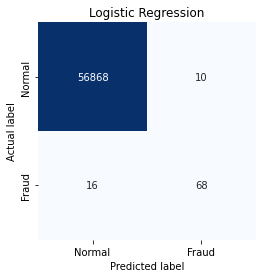

In [190]:
mat3 = confusion_matrix(y_test, y_pred3)
labels = ['Normal', 'Fraud']

sns.heatmap(mat3, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')